<a href="https://colab.research.google.com/github/sadaqatali1234/practice-1/blob/master/e_mail_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Email Spam and Non-Spam Classification**

In [193]:
# import libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

**Collect the Dataset**

In [194]:
# load & read the Data
df= pd.read_csv("/content/s_dataset.csv")


*Print the first five rows*

In [195]:
# print the first five rows
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,nonSpam,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,nonSpam,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,nonSpam,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,nonSpam,Subject: re : indian springs\r\nthis deal is t...,0


**Data Pre-Processing**
<br>
*Deleted unwanted columns*

In [196]:
# delete the unwanted columns
del df["Unnamed: 0"]

*Check the shape*

In [197]:
# check the shape
df.shape

(5171, 3)

In [198]:
# check the columns of dataframe
df.columns

Index(['label', 'text', 'label_num'], dtype='object')

In [199]:
# check all duplicates and drop
df.drop_duplicates(inplace=True)

In [200]:
# after droping check the shape
df.shape

(4993, 3)

In [201]:
# check null values
df.isnull().any()

label        False
text         False
label_num    False
dtype: bool

In [202]:
#Need to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    
    #1 Remove Punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [204]:
#Show the Tokenization (a list of tokens )
df['text'].head(10).apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
5    [Subject, ehronline, web, address, change, mes...
6    [Subject, spring, savings, certificate, take, ...
7    [Subject, looking, medication, best, source, d...
8    [Subject, noms, actual, flow, 2, 26, agree, fo...
9    [Subject, nominations, oct, 21, 23, 2000, see,...
Name: text, dtype: object

**Feature Selection**

In [192]:
# convert a text  to metric of a token
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text']).toarray()

In [239]:
#Get the shape of messages_bow
messages_bow.shape

(4993, 50381)

**Spliting The Data into 70% training and 30% testing**

In [205]:
#Split data into 70% training & 30% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow , df['label'], test_size = 0.30, random_state = 0)

In [285]:
# check the shape of train and test Data
print(f"Shape of train data : {X_train.shape} and Shape of test data: {X_test.shape}")



Shape of train data : (3495, 50381) and Shape of test data: (1498, 50381)


**Using MultinomialNB algorithm**

In [270]:
# using MultinomialNB algoritm on train data 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predicted on Training Data using MultinomialNB**

In [271]:
#Print the predictions
print("Predicated values :",classifier.predict(X_train))
#Print the actual values
print("_________________________________________________________________________________")
print("Actual Values :",y_train.values)

Predicated values : ['nonSpam' 'nonSpam' 'spam' ... 'nonSpam' 'nonSpam' 'spam']
_________________________________________________________________________________
Actual Values : ['nonSpam' 'nonSpam' 'spam' ... 'nonSpam' 'nonSpam' 'spam']


**Using GaussianNB algorithm**

In [273]:
# using MultinomialNB algorithm on train data 
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Prediction on Training Data  using GaussianNB**

In [274]:
# Predicting the training set results by GaussianNB
# print the predictions and actual values by using GaussianNB
print("Prediction values : \n",GN_classifier.predict(X_train))
print("__________________________________________")
print("Actual values : \n",y_train.values)

Prediction values : 
 ['nonSpam' 'nonSpam' 'spam' ... 'nonSpam' 'nonSpam' 'spam']
__________________________________________
Actual values : 
 ['nonSpam' 'nonSpam' 'spam' ... 'nonSpam' 'nonSpam' 'spam']


**Accuracy and Confusion Matrix on training Data**

In [287]:
#Evaluate the model on the training data set
from sklearn.metrics import confusion_matrix ,accuracy_score
pred = classifier.predict(X_train)
print('MultinomialNB Confusion Matrix: \n',confusion_matrix(y_train,pred))
train_accu_MNB=accuracy_score(y_train,pred)
print(f"Training data Accuracy on MultinomialNB :{train_accu_MNB}")
pred_1=GN_classifier.predict(X_train)
print(' GaussianNB Confusion Matrix: \n',confusion_matrix(y_train,pred_1))
train_accu_GNB=accuracy_score(y_train,pred_1)
print(f"Training data Accuracy on GaussianNB :{train_accu_GNB}")




MultinomialNB Confusion Matrix: 
 [[2428   14]
 [  11 1042]]
Training data Accuracy on MultinomialNB :0.9928469241773963
 GaussianNB Confusion Matrix: 
 [[2442    0]
 [  35 1018]]
Training data Accuracy on GaussianNB :0.9899856938483548


**Prediction on Testing Data**

In [295]:
#Print the predictions on MultinomialNB
print("Predicated values :",classifier.predict(X_test))
#Print the actual values
print("_________________________________________________________________________________")
print("Actual Values :",y_test.values)

Predicated values : ['nonSpam' 'nonSpam' 'nonSpam' ... 'spam' 'nonSpam' 'nonSpam']
_________________________________________________________________________________
Actual Values : ['nonSpam' 'nonSpam' 'nonSpam' ... 'spam' 'nonSpam' 'nonSpam']


In [278]:
# Predicting the Test set results by GaussianNB
# print the predictions and actual values by using GaussianNB
print("Prediction values : \n",GN_classifier.predict(X_test))
print("__________________________________________")
print("Actual values : \n",y_test.values)

Prediction values : 
 ['nonSpam' 'nonSpam' 'nonSpam' ... 'spam' 'nonSpam' 'nonSpam']
__________________________________________
Actual values : 
 ['nonSpam' 'nonSpam' 'nonSpam' ... 'spam' 'nonSpam' 'nonSpam']


**Accuracy and Confusion Matrix on testing Data**

In [296]:
#Evaluate the model on the training data set
from sklearn.metrics import confusion_matrix ,accuracy_score
pred = classifier.predict(X_test)
print('MultinomialNB Confusion Matrix: \n',confusion_matrix(y_test,pred))
test_accu_MNB=accuracy_score(y_test,pred)
print(f"Testing data Accuracy on MultinomialNB :{test_accu_MNB}")
pred_1=GN_classifier.predict(X_test)
print(' GaussianNB Confusion Matrix: \n',confusion_matrix(y_test,pred_1))
test_accu_GNB=accuracy_score(y_test,pred_1)
print(f"Testing data Accuracy on GaussianNB :{test_accu_GNB}")

MultinomialNB Confusion Matrix: 
 [[1067   22]
 [  14  395]]
Testing data Accuracy on MultinomialNB :0.9759679572763685
 GaussianNB Confusion Matrix: 
 [[1071   18]
 [  37  372]]
Testing data Accuracy on GaussianNB :0.9632843791722296


**Accuracy on training data by compare algorithm**

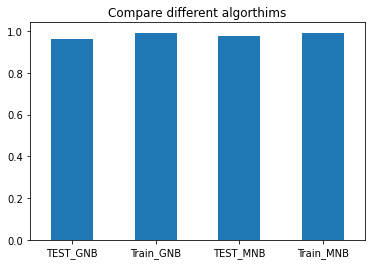

In [294]:

models = pd.DataFrame({"TEST_GNB": test_accu_GNB,
                       "Train_GNB": train_accu_GNB,
                       "TEST_MNB": test_accu_MNB,
                           "Train_MNB": train_accu_MNB
                           },
                          index=[0])

models.T.plot.bar(title="Compare different algorthims",
                      legend=False)
plt.xticks(rotation=0);